In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from scipy.stats import norm
import scipy as sp
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit
from scipy.special import gamma, factorial

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [3]:
def pOfR3(r, px, dpx, alpha, beta, L):
    """
    Bailer-Jones et al. 2020 geometric prior
    """
    #r = r/1000
    #distance prior
    exponent2= -(r/L)**alpha
    prior= (1/(gamma((beta+1)/alpha)))*(alpha/(L**(beta+1)))*((r/1000)**beta)*np.exp(exponent2)
    #likelihood (equation 2) 
    exponent = (-1/(2*(dpx**2)))*((px)--.017-(1/(r/1000)))**2
    P = (1/(dpx*sqrt(2*pi)))*np.exp(exponent)
    ans=P*prior
    return ans

In [4]:
# Posterior PDF from Bailor-Jones et al. (for DR2)

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailer-Jones et al. 2018.
    Here, input r in pc's.
    """
    r = r/1000. #convert pc to kpc
   # px = px + 0.029 #Quasar correction
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans

In [5]:
wzp = -0.029

In [6]:
def p3(r, px, dpx, prior):#alpha, beta, L):
    """
    Bailer-Jones et al. 2020 geometric prior
    """
    r = r/1000
    prior=prior/1000
    #distance prior
    #exponent2= -(r/L)**alpha
    #prior= (1/(gamma((beta+1)/alpha)))*(alpha/(L**(beta+1)))*(r**beta)*np.exp(exponent2)
    #likelihood (equation 2) 
    exponent = (-1/(2*(dpx**2)))*((px)--.017-(1/r))**2
    P = (1/(dpx*sqrt(2*pi)))*np.exp(exponent)
    ans=P*prior
    return ans

In [7]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# Distances to J1747

In [8]:
#SNR of 080
-0.8826751277896280/0.461837

-1.9112265318491761

In [9]:
# dispersion measure distance from NE 2001
d_DM_NE_1747 = 3391.485

# YMW 16 DM model
d_DM_YMW_1747 = 7151.7505

In [10]:
pxmax = 1
pxmin = 15003
gx = np.linspace(pxmax, pxmin, 12001)

In [11]:
#IPTA parallax measurement
pxPTA = .40#*1000
pxPTAerr = 0.70#*1000

In [12]:
px080 = -0.8826751277896280
px080err = 0.461837
alpha080=2.13152278823761
beta080=1.42339630769202
L080=6026.29035091048
prior080=7797.021
# Gaia EDR3 estimate
Gaia080 = []
for xx in gx:
    Gaia080.append(pOfR3(xx, px080, px080err, alpha080, beta080, L080))

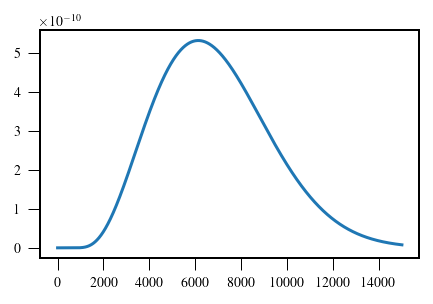

In [13]:
plt.plot(gx, Gaia080)

In [14]:
px544 = 1.8298053540223800
px544err = 0.96622145
alpha544=2.13152278823761
beta544=1.42339630769202
L544=6026.29035091048
Gaia544 = []
for xx in gx:
    Gaia544.append(pOfR3(xx, px544, px544err, alpha544, beta544, L544))

In [15]:
px=np.linspace(-2, 2, 1000)

In [16]:
Gaia544_p=sp.stats.norm.pdf(px, px544, px544err)
Gaia080_p=sp.stats.norm.pdf(px, px080, px080err)
PTAp=sp.stats.norm.pdf(px, pxPTA, pxPTAerr)
combo544px=Gaia544_p*PTAp
combo080px=Gaia080_p*PTAp

In [17]:
Gaia544_px=Gaia544_p/simps(Gaia544_p, px)
Gaia080_px=Gaia080_p/simps(Gaia080_p, px)
PTApx=PTAp/simps(PTAp, px)
c544px_norm=combo544px/simps(combo544px, px)
c080px_norm=combo080px/simps(combo080px, px)

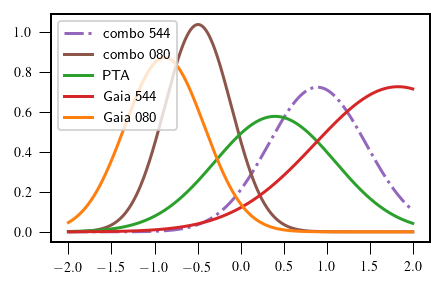

In [18]:
fig, ax1 = plt.subplots()
#dx, np.array(dist_px1024.pdf(px1024)
plt.plot(px, c544px_norm, label='combo 544', color = "C4", linestyle='-.')
plt.plot(px, c080px_norm, label='combo 080', color = "C5")#, linestyle='-.')
plt.plot(px, PTApx, label = 'PTA', color = "C2")#, linestyle='-.')
plt.plot(px, Gaia544_px, label='Gaia 544', color = "C3")
plt.plot(px, Gaia080_px, label='Gaia 080', color = "C1")
plt.legend()
#plt.plot(Gaia3_px)

In [19]:
for k in range(0, 10000):
    if k == 0:
        xx50 = px
        yy50 = c544px_norm
    else:
        xx50 = px[0:-k]
        yy50 =  c544px_norm[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]
per_50


0.870870870870871

In [20]:
for k in range(0, 10000):
    if k == 0:
        xx16 = px
        yy16 = c544px_norm
    else:
        xx16 = px[0:-k]
        yy16 =  c544px_norm[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
per_16

0.31831831831831847

In [21]:
c544px=per_50
c544pxerr=per_50-per_16

In [22]:
for k in range(0, 10000):
    if k == 0:
        xx50 = px
        yy50 = c080px_norm
    else:
        xx50 = px[0:-k]
        yy50 =  c080px_norm[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]
per_50

-0.49449449449449445

In [23]:
for k in range(0, 10000):
    if k == 0:
        xx16 = px
        yy16 = c080px_norm
    else:
        xx16 = px[0:-k]
        yy16 =  c080px_norm[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
per_16

-0.8788788788788788

In [24]:
c080px=per_50
c080pxerr=per_50-per_16

In [25]:
valc544=[]
valc080=[]

for xx in gx:
    valc544.append(pOfR3(xx, c544px, c544pxerr, alpha544, beta544, L544))
    
for yy in gx:
    valc080.append(pOfR3(yy, c080px, c080pxerr, alpha080, beta080, L080))

In [26]:
valPTA=[]

for zz in gx:
    valPTA.append(pOfR(zz, pxPTA, pxPTAerr, 1.94743888544794))

In [27]:
area080 = simps(Gaia080, gx)
areaPTA = simps(valPTA, gx)
area544 = simps (Gaia544, gx)
areac544 = simps(valc544, gx)
areac080=simps(valc080, gx)

In [28]:
truecombo544=valc544/areac544
truecombo080=valc080/areac080

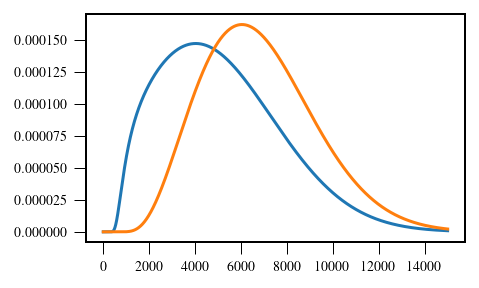

In [29]:
plt.plot(gx, truecombo544)
plt.plot(gx, truecombo080)
#plt.plot(gx, valPTA/areaPTA)

In [30]:
#calculating percentiles 

for k in range(0, 100000):
    if k == 0:
        xx95 = gx
        yy95 = truecombo544
    else:
        xx95 = gx[0:-k]
        yy95 = truecombo544[0:-k]
    v = np.trapz(yy95, xx95)
    if v <= 0.95:
        break
per_95_5 = xx95[-1]
int_95_5= yy95[-1]

for k in range(0, 100000):
    if k == 0:
        xx5 = gx
        yy5 = truecombo544
    else:
        xx5 = gx[0:-k]
        yy5 = truecombo544[0:-k]
    v = np.trapz(yy5, xx5)
    if v <= 0.05:
        break
per_5_5 = xx5[-1]
int_5_5= yy5[-1]

for k in range(0, 100000):
    if k == 0:
        xx16 = gx
        yy16 = truecombo544
    else:
        xx16 = gx[0:-k]
        yy16 = truecombo544[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16_5 = xx16[-1]
int_16_5= yy16[-1]

for k in range(0, 100000):
    if k == 0:
        xx84 = gx
        yy84 = truecombo544
    else:
        xx84 = gx[0:-k]
        yy84 = truecombo544[0:-k]
    v = np.trapz(yy84, xx84)
    if v <= 0.84:
        break
per_84_5 = xx84[-1]
int_84_5= yy84[-1]
    
for k in range(0, 100000):
    if k == 0:
        xx50 = gx
        yy50 = truecombo544
    else:
        xx50 = gx[0:-k]
        yy50 = truecombo544[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50_5 = xx50[-1]

print ("16/84:" + str(per_16_5) + " and "+ str(per_84_5))
per_50_5

16/84:2438.825 and 7832.044


4827.8935

In [31]:
1404.8044767969125-per_84_5

-6427.239523203088

In [32]:
#calculating peak
truecombo544.max()
peak_5=np.where(truecombo544==truecombo544.max())
gx[peak_5]

array([4027.78683333])

In [49]:
per_95_5

9938.574833333334

In [33]:
#calculating percentiles 

for k in range(0, 100000):
    if k == 0:
        xx95 = gx
        yy95 = truecombo080
    else:
        xx95 = gx[0:-k]
        yy95 = truecombo080[0:-k]
    v = np.trapz(yy95, xx95)
    if v <= 0.95:
        break
per_95_0 = xx95[-1]
int_95_0= yy95[-1]

for k in range(0, 100000):
    if k == 0:
        xx5 = gx
        yy5 = truecombo080
    else:
        xx5 = gx[0:-k]
        yy5 = truecombo080[0:-k]
    v = np.trapz(yy5, xx5)
    if v <= 0.05:
        break
per_5_0 = xx5[-1]
int_5_0= yy5[-1]

for k in range(0, 100000):
    if k == 0:
        xx16 = gx
        yy16 = truecombo080
    else:
        xx16 = gx[0:-k]
        yy16 = truecombo080[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16_0 = xx16[-1]
int_16_0= yy16[-1]

for k in range(0, 100000):
    if k == 0:
        xx84 = gx
        yy84 = truecombo080
    else:
        xx84 = gx[0:-k]
        yy84 = truecombo080[0:-k]
    v = np.trapz(yy84, xx84)
    if v <= 0.84:
        break
per_84_0 = xx84[-1]
int_84_0= yy84[-1]
    
for k in range(0, 100000):
    if k == 0:
        xx50 = gx
        yy50 = truecombo080
    else:
        xx50 = gx[0:-k]
        yy50 = truecombo080[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50_0 = xx50[-1]

print ("16/84:" + str(per_16_0) + " and "+ str(per_84_0))
per_50_0

16/84:4331.577333333334 and 9263.484833333334


6566.875333333333

In [47]:
per_95_0

11168.738833333333

In [34]:
#calculating peak
truecombo080.max()
peak_0=np.where(truecombo080==truecombo080.max())
gx[peak_0]

array([6041.80533333])

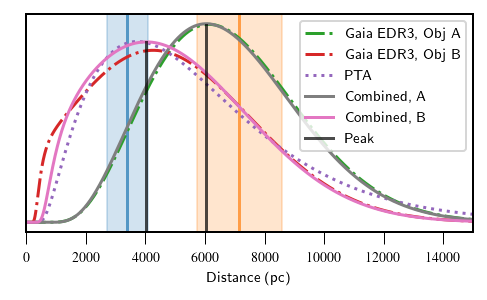

In [44]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1747 *.8, d_DM_NE_1747*1.2, alpha=0.2, color = "C0")#, label = "NE 2001")
plt.axvline(d_DM_NE_1747, ymin=0, ymax=1, color = "C0", alpha=.7)

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1747*.8, d_DM_YMW_1747*1.2, alpha=0.2, color = "C1")#, label = "YMW 16")
plt.axvline(d_DM_YMW_1747, ymin=0, ymax=1, color = "C1", alpha=.7)

# Gaia DR3 distances
plt.plot(gx, np.array(Gaia080)/area080, label = "Gaia EDR3, Obj A", color = "C2", linestyle='-.')
plt.plot(gx, np.array(Gaia544)/area544, label = "Gaia EDR3, Obj B", color = "C3", linestyle='-.')

#PTA
plt.plot(gx, np.array(valPTA)/areaPTA, label = "PTA", color = "C4", linestyle=':')
plt.plot(gx, np.array(truecombo080), label = "Combined, A", color = "C7", linestyle='solid')

plt.plot(gx, np.array(truecombo544), label = "Combined, B", color = "C6", linestyle='solid')

# percentile

plt.axvline(gx[peak_5], ymin=0, ymax=.87, color = "k", label = "Peak", linestyle="-", alpha =.7)
plt.axvline(gx[peak_0], ymin=0, ymax=.95, color = "k", linestyle="-", alpha =.7)
#plt.axvline(per_5_5, ymin=0, ymax=.2, color = "b", label = "5, 95 \%", linestyle=":")
#plt.axvline(per_84_5, ymin=0, ymax=.6, color = "k", label= "84, 16 \%", linestyle=":")
#plt.axvline(per_16_5, ymin=0, ymax=.4, color = "k", linestyle=":")
#plt.axvline(per_95_5, ymin=0, ymax=.2, color = "b", linestyle=":")

ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
plt.tight_layout()
plt.xlim(0,15000)

plt.savefig("J1747_all_distances_wbj.pdf")

In [36]:
# log transform
new1747 = []
for ii in combo:
    new1747.append(10**(ii))

In [72]:
from scipy.optimize import curve_fit